In [1]:
from sklearn.linear_model import Ridge
import numpy as np
import sklearn.datasets
from sklearn import linear_model
import sklearn.cross_validation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import ensemble
import time
import random

/Users/s0c01xa/Desktop/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import cv2
import tqdm


In [3]:
def get_list_image(imagepath): 
    import os
    folder_path=imagepath
    image_list=[]
    for filename in os.listdir(folder_path):
        if(filename.endswith('.jpg') | filename.endswith('.jpeg') | filename.endswith('.png')):
        #it will open the filename
            #f=open(folder_path + '/' + filename)
            #print f
            image=cv2.imread(folder_path + '/' + filename)
            #image=cv2.imread(os.path.join(folder_path,filename))
            image_list.append(image)
    return image_list

'''a=[]
import os
folder_path='/Users/s0c01xa/Desktop/Frontview'
image_list=[]
for filename in os.listdir(folder_path):
    a.append(filename)'''

"a=[]\nimport os\nfolder_path='/Users/s0c01xa/Desktop/Frontview'\nimage_list=[]\nfor filename in os.listdir(folder_path):\n    a.append(filename)"

# GETTING IMAGE DATASET

In [4]:
front_view=get_list_image('/Users/s0c01xa/Desktop/Frontview')
back_view= get_list_image('/Users/s0c01xa/Desktop/Backview')
side_view= get_list_image('/Users/s0c01xa/Desktop/Sideview')


In [5]:
#plt.imshow(front_view[2])
#plt.imshow(back_view[0])
#plt.imshow(side_view[2])
#plt.show()


In [6]:
#np.shape(front_view[2])


# GETTING THE Y ENCODINGS 

In [5]:
y_front= np.array([2]*len(front_view))
y_back=np.array([1]*len(back_view))
y_side=np.array([0]*len(side_view))


# Converting the images to same size and gray scale

In [6]:
def get_processed_image(img_list):
    res_image_list=[]
    for i in range(0,len(img_list)):
        resized_image=cv2.resize(img_list[i],(200,200))
        img_gray=cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
        res_image_list.append(img_gray)
    return res_image_list

In [7]:
front_view_processed=get_processed_image(front_view)
back_view_processed= get_processed_image(back_view)
side_view_processed= get_processed_image(side_view)

In [10]:
#np.shape(front_view_processed[99])

# HOG FEATURES EXTRACTION

In [11]:
#plt.imshow(front_view_processed[0])
#plt.show()

In [8]:
from skimage import feature
H = feature.hog(front_view_processed[0], orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
np.shape(H)

(20736,)

In [9]:
def get_hog_feature_array(image_list):
    hog_feat_arr=np.zeros((len(image_list),20736))
    from skimage import feature
    for i in range(0,len(image_list)):
        H = feature.hog(image_list[i], orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
        hog_feat_arr[i]=H
        
    return hog_feat_arr
    

# HOG FEATURES


In [101]:
hog_front=get_hog_feature_array(front_view_processed)
hog_back=get_hog_feature_array(back_view_processed)
hog_side=get_hog_feature_array(side_view_processed)


In [11]:
hog_front.shape

(107, 20736)

# VISUALIZING HOG


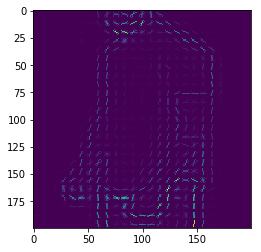

In [13]:
from skimage import exposure
from skimage import feature
import cv2
 
#H- it saves the HOG feature vector and hogImage


(H, hogImage) = feature.hog(side_view_processed[0], orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2",
                            visualise=True)

hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
 
plt.imshow(hogImage)
plt.show()

# CONCATENATING FEATURES


In [102]:
train_x= np.concatenate((hog_front, hog_back,hog_side), axis=0)
train_y=np.concatenate((y_front, y_back,y_side), axis=0)


In [103]:
np.shape(train_y)


(310,)

# SVM PREDICTOR


In [69]:
from sklearn.svm import SVC
svc_hog=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)
svc_hog.fit(train_x,train_y) 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

In [70]:
np.mean(cross_val_score(svc_hog,train_x,train_y,cv=10))

0.6222077771598071

# Multinomial Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
log_model_hog=LogisticRegression(penalty='l2', dual=False, tol=0.01, C=1.0, fit_intercept=True, intercept_scaling=1, 
                   class_weight=None, random_state=None, solver='sag', max_iter=50, 
                   multi_class='multinomial', verbose=0, warm_start=False, n_jobs=-1)
log_model_hog.fit(train_x,train_y) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='sag',
          tol=0.01, verbose=0, warm_start=False)

In [21]:
np.mean(cross_val_score(log_model_hog,train_x,train_y,cv=10))


0.7123602614015573

In [106]:
cross_val_score(log_model_hog,train_x,train_y,cv=10)


array([0.59375   , 0.875     , 0.84375   , 0.78125   , 0.65625   ,
       0.67741935, 0.70967742, 0.6       , 0.55172414, 0.5862069 ])

# Random Forest

In [22]:
#Cross Validation


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y, test_size=0.33, random_state=49)


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model_hog= RandomForestClassifier(n_estimators=40, criterion='entropy', 
                                 max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                                 n_jobs=-1)
rf_model_hog.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
from skopt import gp_minimize
def objective(params):
    max_depth=params[0]
    min_samples_split=params[1]
    min_samples_leaf=params[2]
    criterion=params[3]
    rf_model_hog= RandomForestClassifier(n_estimators=40, criterion=criterion, 
                                 max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, 
                                 min_weight_fraction_leaf=0.0, max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                                 n_jobs=-1)
    #model.fit(xdata,ydata)
    
    return (1-np.mean(cross_val_score(rf_model_hog,X_train,y_train,cv=10,scoring='accuracy')))

space=[(1,30),(2,100),(1,50),('gini','entropy')]
r=gp_minimize(objective,space,n_calls=50,random_state=1)


#Parameter Values(params)
print r.x

#Minimal Objective Function
print r.fun



/Users/s0c01xa/Desktop/anaconda2/lib/python2.7/site-packages/skopt/optimizer/optimizer.py:384: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[8, 3, 1, 'entropy']
0.30378881987577633


In [24]:
cross_val_score(rf_model_hog,X_train,y_train,cv=10)


array([0.56521739, 0.56521739, 0.47619048, 0.5       , 0.75      ,
       0.7       , 0.45      , 0.55      , 0.55      , 0.4       ])

In [26]:
#y_pred=rf_model.predict(train_x)
rf_model_hog.score(X_test,y_test)


0.6796116504854369

# Decission Trees

In [29]:
from sklearn import tree
dec_tree_hog = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2, 
                                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                                           min_impurity_decrease=0.0, min_impurity_split=None)
dec_tree_hog.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
dec_tree_hog.score(X_test,y_test)


0.6504854368932039

In [30]:
np.mean(cross_val_score(dec_tree_hog,X_train,y_train,cv=10))


0.5260766045548654

In [28]:
from skopt import gp_minimize
def objective(params):
    max_depth=params[0]
    min_samples_split=params[1]
    min_samples_leaf=params[2]
    criterion=params[3]
    dec_tree_hog=DecisionTreeClassifier(random_state=0,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,criterion=criterion)
    #model.fit(xdata,ydata)
    
    return (1-np.mean(cross_val_score(dec_tree_hog,X_train,y_train,cv=10,scoring='accuracy')))

space=[(1,30),(2,100),(1,50),('gini','entropy')]
r=gp_minimize(objective,space,n_calls=50,random_state=1)


#Parameter Values(params)
print r.x

#Minimal Objective Function
print r.fun

[13, 21, 15, 'gini']
0.4532712215320911


# Naive Bayes HOG


In [31]:
from sklearn.naive_bayes import GaussianNB
gnb_hog = GaussianNB()
gnb_hog.fit(X_train,y_train)


GaussianNB(priors=None)

In [32]:
np.mean(cross_val_score(gnb_hog,X_train,y_train,cv=10))


0.6212111801242235

# EXTRACTING FEATURES FROM PRE_TRAINED CNN

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras import applications


In [35]:
def get_feat_image(img_list):
    image_list=[]
    for i in range(0,len(img_list)):
        resized_image=cv2.resize(img_list[i],(224,224))
        image_list.append(resized_image)
    return image_list


In [36]:
front_view_dp=get_feat_image(front_view)
back_view_dp= get_feat_image(back_view)
side_view_dp= get_feat_image(side_view)


# MOBILENET

In [37]:
mobilenet=applications.mobilenet.MobileNet(input_shape=(224,224,3),include_top=False,pooling='max')
#mobilenet.summary()


In [38]:
from keras.preprocessing import image
def get_array_features(list_img):
    arr_img=np.zeros((len(list_img),1024))
    for i in range(0,len(list_img)):
        array=image.img_to_array(list_img[i])
        #print np.shape(array)
        arr_batch=np.expand_dims(array,axis=0)
        arr_prep=applications.mobilenet.preprocess_input(arr_batch)
        feat=mobilenet.predict(arr_prep)
        arr_img[i]=feat
        
    return arr_img

    
    

In [39]:
arr_batch=np.expand_dims(front_view_dp[0],axis=0)


In [36]:
#applications.mobilenet.preprocess_input(arr_batch)


In [40]:
feat_front_mobnet=get_array_features(front_view_dp)
feat_back_mobnet=get_array_features(back_view_dp)
feat_side_mobnet=get_array_features(side_view_dp)

In [38]:
#feat_side.shape

In [39]:
#GET FEATURES 

In [107]:
X= np.concatenate((feat_front_mobnet, feat_back_mobnet,feat_side_mobnet), axis=0)
Y=np.concatenate((y_front, y_back,y_side), axis=0)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=49)

# RANDOM FOREST

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_model_mobnet= RandomForestClassifier(n_estimators=40, criterion='entropy', 
                                 max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                                 n_jobs=1)
rf_model_mobnet.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
rf_model_mobnet.score(X_test,y_test)

0.883495145631068

In [44]:
cross_val_score(rf_model_mobnet,X_train,y_train,cv=15)

array([0.86666667, 0.86666667, 0.92857143, 1.        , 0.85714286,
       0.92857143, 0.92857143, 1.        , 0.92857143, 0.78571429,
       0.85714286, 1.        , 0.84615385, 0.91666667, 0.66666667])

In [47]:
from skopt import gp_minimize
def objective(params):
    max_depth=params[0]
    min_samples_split=params[1]
    min_samples_leaf=params[2]
    criterion=params[3]
    rf_model_mobnet= RandomForestClassifier(n_estimators=40, criterion='entropy', 
                                 max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                                 n_jobs=1)
    #model.fit(xdata,ydata)
    
    return (1-np.mean(cross_val_score(rf_model_mobnet,X_train,y_train,cv=10,scoring='accuracy')))

space=[(1,30),(2,100),(1,50),('gini','entropy')]
r=gp_minimize(objective,space,n_calls=50,random_state=1)


#Parameter Values(params)
print r.x

#Minimal Objective Function
print r.fun




[18, 100, 1, 'entropy']
0.06304347826086976


In [48]:
1-0.063

0.937

# SVM

In [49]:
from sklearn.svm import SVC
svc_mobnet=SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)
svc_mobnet.fit(X_train,y_train)



SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

In [50]:
svc_mobnet.score(X_test,y_test)

0.9611650485436893

In [51]:
np.mean(cross_val_score(svc_mobnet,X_train,y_train,cv=10))

0.942608695652174

# DECISSION TREE

In [52]:
from sklearn import tree
dec_tree_hog = tree.DecisionTreeClassifier(criterion='gini', max_depth=13,min_samples_split=21, 
                                           min_samples_leaf=15)
dec_tree_hog.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=21,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
dec_tree_hog.score(X_test,y_test)

0.7184466019417476

In [50]:
cross_val_score(dec_tree_hog,X_train,y_train,cv=10)

array([0.86956522, 0.82608696, 0.76190476, 0.7       , 0.95      ,
       0.95      , 0.7       , 0.8       , 0.85      , 0.6       ])

# Bayesian Optimization

In [247]:
from skopt import gp_minimize
def objective(params):
    max_depth=params[0]
    min_samples_split=params[1]
    min_samples_leaf=params[2]
    criterion=params[3]
    model=DecisionTreeClassifier(random_state=0,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,criterion=criterion)
    #model.fit(xdata,ydata)
    
    return (1-np.mean(cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy')))

space=[(1,30),(2,100),(1,50),('gini','entropy')]
r=gp_minimize(objective,space,n_calls=10,random_state=1)


#Parameter Values(params)
print r.x

#Minimal Objective Function
print r.fun


[13, 21, 15, 'gini']
0.19924430641821955


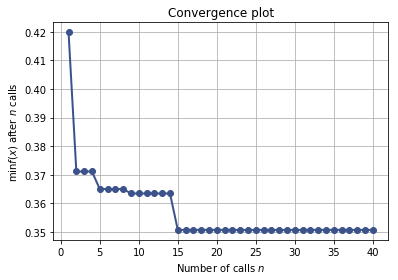

In [111]:
from skopt.plots import plot_convergence
import matplotlib.pyplot as plt
plot_convergence(r)
plt.show()

# Multinomial Logistic 

In [109]:
from sklearn.linear_model import LogisticRegression
log_model_mobnet=LogisticRegression(penalty='l2', dual=False, tol=0.01, C=1.0, fit_intercept=True, intercept_scaling=1, 
                   class_weight=None, random_state=None, solver='sag', max_iter=50, 
                   multi_class='multinomial', verbose=0, warm_start=False, n_jobs=-1)
log_model_mobnet.fit(X_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='sag',
          tol=0.01, verbose=0, warm_start=False)

In [55]:
np.mean(cross_val_score(log_model_mobnet,X_train,y_train,cv=10))


0.9469565217391305

In [110]:
cross_val_score(log_model_mobnet,X_train,y_train,cv=10)


array([0.82608696, 0.95652174, 1.        , 0.95      , 1.        ,
       1.        , 0.95      , 0.9       , 0.9       , 0.9       ])

# #Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
gnb_mobnet = GaussianNB()
gnb_mobnet.fit(X_train,y_train)


GaussianNB(priors=None)

In [57]:
np.mean(cross_val_score(gnb_mobnet,X_train,y_train,cv=10))


0.8563457556935818

# VGG16

In [60]:
vgg16=applications.vgg16.VGG16(input_shape=(224,224,3),include_top=False,pooling='max')
#model.summary()

In [61]:
from keras.preprocessing import image
def get_array_vgg16_features(list_img):
    arr_img=np.zeros((len(list_img),512))
    for i in range(0,len(list_img)):
        array=image.img_to_array(list_img[i])
        #print np.shape(array)
        arr_batch=np.expand_dims(array,axis=0)
        arr_prep=applications.vgg16.preprocess_input(arr_batch)
        feat=vgg16.predict(arr_prep)
        arr_img[i]=feat
        
    return arr_img



In [62]:
vgg16_feat_front=get_array_vgg16_features(front_view_dp)
vgg16_feat_back=get_array_vgg16_features(back_view_dp)
vgg16_feat_side=get_array_vgg16_features(side_view_dp)


In [143]:
#vgg16_feat_side.shape


In [63]:
X_vgg16= np.concatenate((vgg16_feat_front, vgg16_feat_back,vgg16_feat_side), axis=0)
Y_vgg16= np.concatenate((y_front, y_back,y_side), axis=0)


In [64]:
from sklearn.model_selection import train_test_split
X_train_vgg16, X_test_vgg16, y_train_vgg16, y_test_vgg16 = train_test_split(X_vgg16,Y_vgg16, test_size=0.33, random_state=49)

# Random Forest with VGG features


In [226]:
from sklearn.ensemble import RandomForestClassifier
rf_model_vgg16= RandomForestClassifier(n_estimators=50, criterion='entropy', 
                                 max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                                 n_jobs=1)
rf_model_vgg16.fit(X_train_vgg16,y_train_vgg16)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [227]:
rf_model.score(X_test_vgg16,y_test_vgg16)


0.883495145631068

In [228]:
cross_val_score(rf_model_vgg16,X_train_vgg16,y_train_vgg16,cv=10)


array([0.7826087 , 0.7826087 , 0.85714286, 0.85      , 0.9       ,
       0.8       , 0.9       , 0.75      , 0.75      , 0.85      ])

In [65]:
from skopt import gp_minimize
def objective(params):
    max_depth=params[0]
    min_samples_split=params[1]
    min_samples_leaf=params[2]
    criterion=params[3]
    rf_model_vgg16= RandomForestClassifier(n_estimators=40, criterion='entropy', 
                                 max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                                 n_jobs=1)
    #model.fit(xdata,ydata)
    
    return (1-np.mean(cross_val_score(rf_model_vgg16,X_train_vgg16,y_train_vgg16,cv=10,scoring='accuracy')))

space=[(1,30),(2,100),(1,50),('gini','entropy')]
r=gp_minimize(objective,space,n_calls=50,random_state=1)


#Parameter Values(params)
print r.x

#Minimal Objective Function
print r.fun



[30, 97, 50, 'entropy']
0.12608695652173907


# SVM


In [73]:
from sklearn.svm import SVC
svc_vgg16=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.00001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)
svc_vgg16.fit(X_train_vgg16,y_train_vgg16)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

In [74]:
svc_vgg16.score(X_test_vgg16,y_test_vgg16)


0.8446601941747572

In [75]:
np.mean(cross_val_score(svc_vgg16,X_train_vgg16,y_train_vgg16,cv=10))


0.8298033126293995

# Decission Tree

In [254]:
from sklearn import tree
dec_tree_vgg16 = tree.DecisionTreeClassifier(criterion='gini', max_depth=10,min_samples_split=15, 
                                           min_samples_leaf=10)
dec_tree_vgg16.fit(X_train_vgg16,y_train_vgg16)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [256]:
dec_tree_vgg16.score(X_test_vgg16,y_test_vgg16)


0.7572815533980582

In [259]:
cross_val_score(dec_tree_vgg16,X_train_vgg16,y_train_vgg16,cv=10)


array([0.69565217, 0.73913043, 0.80952381, 0.65      , 0.75      ,
       0.85      , 0.8       , 0.7       , 0.7       , 0.65      ])

In [78]:
from skopt import gp_minimize
def objective(params):
    max_depth=params[0]
    min_samples_split=params[1]
    min_samples_leaf=params[2]
    criterion=params[3]
    dec_tree_vgg16=DecisionTreeClassifier(random_state=0,max_depth=max_depth,
                                 min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,
                                 criterion=criterion)
    #model.fit(xdata,ydata)
    
    return (1-np.mean(cross_val_score(dec_tree_vgg16,X_train_vgg16,y_train_vgg16,cv=10,scoring='accuracy')))

space=[(1,30),(2,100),(1,50),('gini','entropy')]
r=gp_minimize(objective,space,n_calls=40,random_state=1)


#Parameter Values(params)
print r.x

#Minimal Objective Function
print r.fun





[5, 96, 22, 'gini']
0.2514596273291926


# Multinomial Logistic

In [79]:
from sklearn.linear_model import LogisticRegression
log_model_vgg=LogisticRegression(penalty='l2', dual=False, tol=0.01, C=1.0, fit_intercept=True, intercept_scaling=1, 
                   class_weight=None, random_state=None, solver='sag', max_iter=50, 
                   multi_class='multinomial', verbose=0, warm_start=False, n_jobs=-1)
log_model_vgg.fit(X_train_vgg16,y_train_vgg16) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='sag',
          tol=0.01, verbose=0, warm_start=False)

In [80]:
np.mean(cross_val_score(log_model_vgg,X_train_vgg16,y_train_vgg16,cv=10))

0.8982608695652173

# Naive Bayes


In [81]:
from sklearn.naive_bayes import GaussianNB
gnb_vgg = GaussianNB()
gnb_vgg.fit(X_train_vgg16,y_train_vgg16)

GaussianNB(priors=None)

In [82]:
np.mean(cross_val_score(gnb_vgg,X_train_vgg16,y_train_vgg16,cv=10))

0.8022360248447203

# INCEPTION MODEL

In [83]:
inception_v3=applications.inception_v3.InceptionV3(input_shape=(224,224,3),include_top=False,pooling='max')


87924736/87910968 [==============================] - 511s 6us/step


In [85]:
#inception_v3.summary()

In [88]:
from keras.preprocessing import image
def get_array_inception_v3_features(list_img):
    arr_img=np.zeros((len(list_img),2048))
    for i in range(0,len(list_img)):
        array=image.img_to_array(list_img[i])
        #print np.shape(array)
        arr_batch=np.expand_dims(array,axis=0)
        arr_prep=applications.inception_v3.preprocess_input(arr_batch)
        feat=inception_v3.predict(arr_prep)
        arr_img[i]=feat
        
    return arr_img


In [89]:
inception_v3_feat_front=get_array_inception_v3_features(front_view_dp)
inception_v3_feat_back=get_array_inception_v3_features(back_view_dp)
inception_v3_feat_side=get_array_inception_v3_features(side_view_dp)

In [90]:
X= np.concatenate((inception_v3_feat_front, inception_v3_feat_back,inception_v3_feat_side), axis=0)
Y=np.concatenate((y_front, y_back,y_side), axis=0)

In [91]:
from sklearn.model_selection import train_test_split
X_train_inception, X_test_inception, y_train_inception, y_test_inception = train_test_split(X,Y, test_size=0.33, random_state=49)

# Random Forest

In [92]:
from skopt import gp_minimize
def objective(params):
    max_depth=params[0]
    min_samples_split=params[1]
    min_samples_leaf=params[2]
    criterion=params[3]
    rf_model_inception= RandomForestClassifier(n_estimators=40, criterion='entropy', 
                                 max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                                 n_jobs=1)
    #model.fit(xdata,ydata)
    
    return (1-np.mean(cross_val_score(rf_model_inception,X_train_inception,y_train_inception,cv=10,scoring='accuracy')))

space=[(1,30),(2,100),(1,50),('gini','entropy')]
r=gp_minimize(objective,space,n_calls=50,random_state=1)


#Parameter Values(params)
print r.x

#Minimal Objective Function
print r.fun


[2, 95, 50, 'gini']
0.20193581780538294


# SVM

In [ ]:
from sklearn.svm import SVC
svc_inception=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.00001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)
svc_inception.fit(X_train_inception,y_train_inception)



In [95]:
np.mean(cross_val_score(svc_inception,X_train_vgg16,y_train_vgg16,cv=10))

0.8298033126293995

# Multinomial Logistic

In [96]:
from sklearn.linear_model import LogisticRegression
log_model_inception=LogisticRegression(penalty='l2', dual=False, tol=0.01, C=1.0, fit_intercept=True, intercept_scaling=1, 
                   class_weight=None, random_state=None, solver='sag', max_iter=50, 
                   multi_class='multinomial', verbose=0, warm_start=False, n_jobs=-1)
log_model_inception.fit(X_train_inception,y_train_inception) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='sag',
          tol=0.01, verbose=0, warm_start=False)

In [97]:
np.mean(cross_val_score(log_model_inception,X_train_vgg16,y_train_vgg16,cv=10))

0.9082608695652172

# Decission Tree


In [98]:
from skopt import gp_minimize
def objective(params):
    max_depth=params[0]
    min_samples_split=params[1]
    min_samples_leaf=params[2]
    criterion=params[3]
    dec_tree_inception=DecisionTreeClassifier(random_state=0,max_depth=max_depth,
                                 min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,
                                 criterion=criterion)
    #model.fit(xdata,ydata)
    
    return (1-np.mean(cross_val_score(dec_tree_inception,X_train_inception,y_train_inception,cv=10,scoring='accuracy')))

space=[(1,30),(2,100),(1,50),('gini','entropy')]
r=gp_minimize(objective,space,n_calls=40,random_state=1)


#Parameter Values(params)
print r.x

#Minimal Objective Function
print r.fun




[30, 100, 50, 'entropy']
0.3507660455486542


# Naive Bayes

In [99]:
from sklearn.naive_bayes import GaussianNB
gnb_inception = GaussianNB()
gnb_inception.fit(X_train_inception,y_train_inception)

GaussianNB(priors=None)

In [100]:
np.mean(cross_val_score(gnb_inception,X_train_inception,y_train_inception,cv=10,scoring='accuracy'))

0.6818012422360249